In [20]:
import pandas as pd
mean_df = pd.read_csv("/work/users/r/p/rphadke/JSALT/eval/combined_md.csv")
total_df = pd.read_csv("/work/users/r/p/rphadke/JSALT/eval/combined_td.csv")
occ_df = pd.read_csv("/work/users/r/p/rphadke/JSALT/eval/combined_o.csv")

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
metrics = ["IPU", "Turn", "Pause", "Gap", "Interruption", "Backchannel"]
all_types = ['Ablation-Layered', "Ablation-Seq", 'Generated', 'Real']
color_map = {
    'Ablation-Layered': 'tab:blue',
    "Ablation-Seq": "tab:purple",
    'Generated': 'tab:orange',
    'Real': 'tab:green'
}

# Mean Durations of Certain Turn Taking Metrics

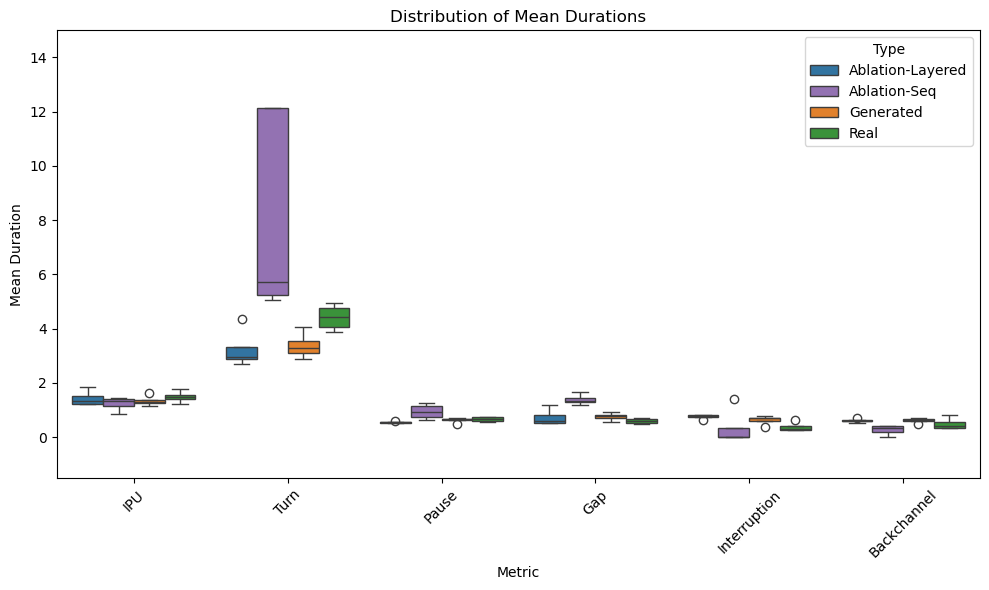

In [25]:
# Box plots: Distributions of mean durations
mean_melted = mean_df.melt(id_vars=["Type"], value_vars=metrics, var_name="Metric", value_name="Mean Duration")
plt.figure(figsize=(10, 6))
sns.boxplot(data=mean_melted, x="Metric", y="Mean Duration", hue="Type", hue_order=all_types, palette=color_map)
plt.title("Distribution of Mean Durations")
plt.xticks(rotation=45)
plt.ylim(ymax=15)
plt.tight_layout()

# Occurrences of Certain Turn Taking Metrics

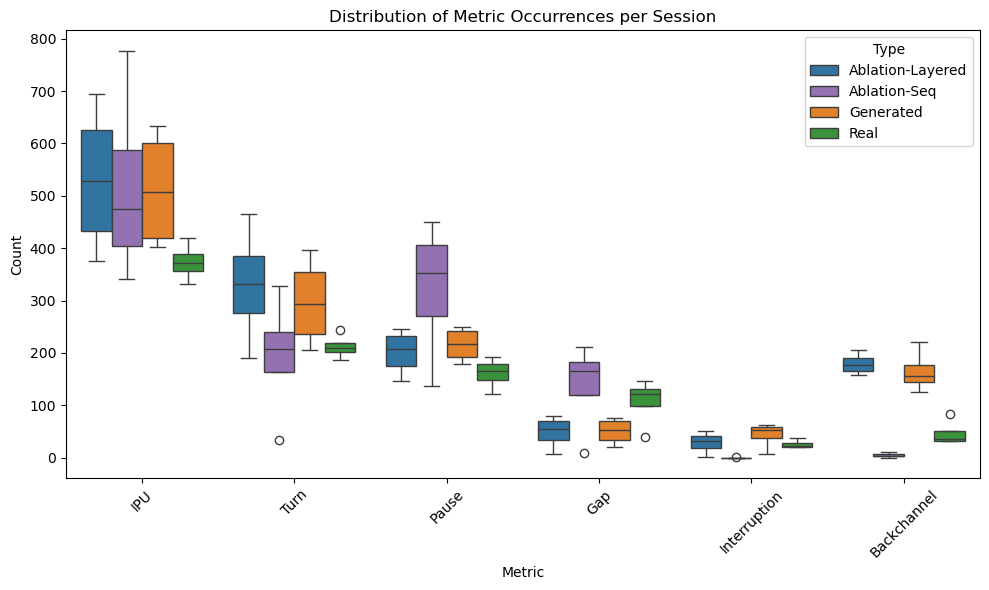

In [26]:
# === Occurrences Boxplot ===
occ_melted = occ_df.melt(id_vars=["Type"], value_vars=metrics,
                        var_name="Metric", value_name="Count")
plt.figure(figsize=(10, 6))
sns.boxplot(data=occ_melted, x="Metric", y="Count", hue="Type", hue_order=all_types, palette=color_map)
plt.title("Distribution of Metric Occurrences per Session")
plt.xticks(rotation=45)
# plt.ylim(ymax=15)
plt.tight_layout()

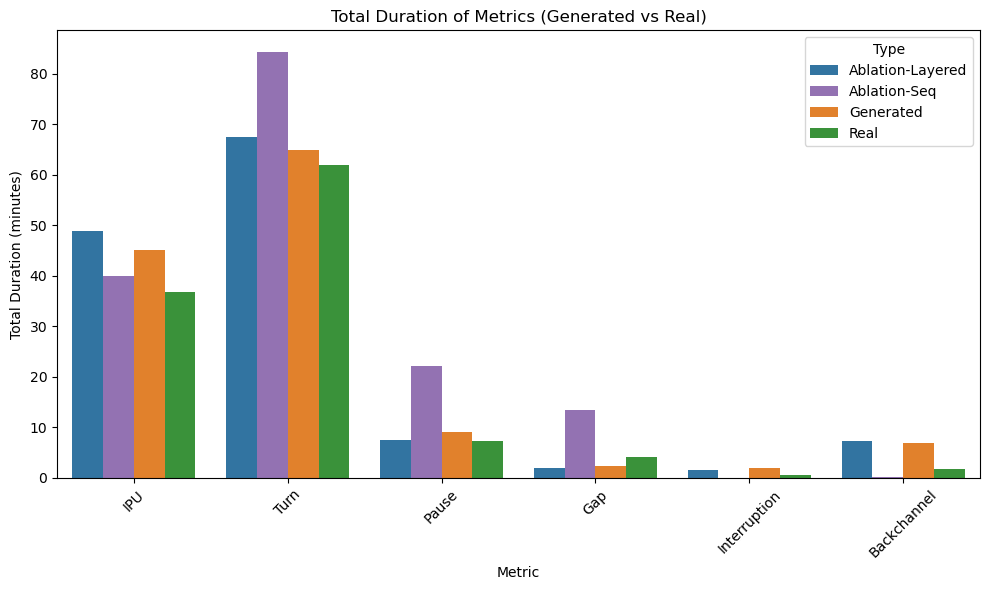

In [27]:
# Bar plots: Total durations
total_grouped = total_df.groupby("Type")[metrics].sum().reset_index()
melted = total_grouped.melt(id_vars="Type",
                            value_vars=metrics,
                            var_name="Metric",
                            value_name="TotalDuration")

plt.figure(figsize=(10,6))
sns.barplot(
    data=melted,
    x="Metric",
    y="TotalDuration",
    hue="Type",
    hue_order=all_types,      # your desired order
    palette=color_map         # your mapping { type: color }
)
plt.title("Total Duration of Metrics (Generated vs Real)")
plt.ylabel("Total Duration (minutes)")
plt.xlabel("Metric")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()